<a href="https://colab.research.google.com/github/taylorec/Ecommerce-Analytics-with-Python/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google BigQuery - thelook_ecommerce database
> Tables: distribution_centers, events, inventory_items, order_items, orders, products and users

> Objective of this file: gather data from the orders, users, order_items and products tables into a dataframe to explore the features listed below and to find insights into customer demand.

        order id,
        user id,
        ship to country,
        customer age,
        customer gender,
        product id,
        product sales price,
        order shipped from DC
        product cost,
        product category,
        product department,
        product profit margin

> Isights: 
 >> Sales grown linearly from 2019 to 2022 and exponentially in 2023.

 >> There is no correlation between customer age and sales volume.

 >> Blazers & Jackets have the highest profit margins in the clothing category at 62% while Socks have the lowest at 40%.

 >> Orders shipping out of the Texas DC have the highest profit margins at 53.2% while the South Carolina DC is the lowest at 50.4%. 

> Google Data Studio Dashboard link: https://lookerstudio.google.com/s/kyP95m64-NY


In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%load_ext google.colab.data_table

In [ ]:
project_id = 'sixth-flag-316719'

In [ ]:
from google.cloud import bigquery
 
client = bigquery.Client(project=project_id)

In [ ]:
dc = client.query('''
SELECT 
        *
FROM
        `bigquery-public-data.thelook_ecommerce.distribution_centers`
''' ).to_dataframe()

In [ ]:
# Ecommerce Distribution Centers

dc

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [ ]:
dc['state'] = dc['name'].apply(lambda name: name[-2:])

In [ ]:
dc

,id,name,latitude,longitude,state
0,1,Memphis TN,35.1174,-89.9711,TN
1,2,Chicago IL,41.8369,-87.6847,IL
2,3,Houston TX,29.7604,-95.3698,TX
3,4,Los Angeles CA,34.0500,-118.2500,CA
4,5,New Orleans LA,29.9500,-90.0667,LA
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,NJ
6,7,Philadelphia PA,39.9500,-75.1667,PA
7,8,Mobile AL,30.6944,-88.0431,AL
8,9,Charleston SC,32.7833,-79.9333,SC
9,10,Savannah GA,32.0167,-81.1167,GA


In [ ]:
orders_info = client.query('''
SELECT 
        orders.order_id,
        orders.user_id,
        users.country,
        users.age,
        users.gender,
        order_items.product_id,
        order_items.sale_price,
        FORMAT_DATE('%m/%Y', CAST(order_items.shipped_at AS DATE)) as shipped_at,
        products.cost,
        products.category,
        products.department,
        products.distribution_center_id,
FROM
        `bigquery-public-data.thelook_ecommerce.orders` orders
JOIN
        `bigquery-public-data.thelook_ecommerce.users` users ON orders.user_id = users.id
JOIN
        `bigquery-public-data.thelook_ecommerce.order_items` order_items ON orders.order_id = order_items.order_id
JOIN
        `bigquery-public-data.thelook_ecommerce.products` products ON order_items.product_id = products.id
''' ).to_dataframe()

In [ ]:
# Customer Orders
orders = orders_info.copy()
orders.head(10)

,order_id,user_id,country,age,gender,product_id,sale_price,shipped_at,cost,category,department,distribution_center_id
0,359,286,United States,12,F,8343,139.990005,12/2022,62.295552,Outerwear & Coats,Women,2
1,644,517,China,12,F,9866,38.000000,08/2022,22.838000,Sleep & Lounge,Women,1
2,1314,1060,South Korea,12,F,2883,25.000000,12/2022,11.725000,Active,Women,2
3,1314,1060,South Korea,12,F,3428,16.990000,12/2022,8.189180,Dresses,Women,9
4,1969,1584,United Kingdom,12,F,15731,31.410000,05/2020,16.898580,Plus,Women,6
5,2025,1622,Germany,12,F,904,43.980000,05/2021,20.538660,Sweaters,Women,1
6,2160,1728,Brasil,12,F,8620,66.000000,04/2023,27.918000,Outerwear & Coats,Women,6
7,2160,1728,Brasil,12,F,4318,50.990002,04/2023,27.126681,Jeans,Women,4
8,2200,1767,United Kingdom,12,F,13054,148.000000,12/2022,62.012000,Swim,Women,3
9,2482,1981,China,12,F,15560,34.000000,09/2022,18.496000,Plus,Women,2


In [ ]:
orders.info()

# 181,218 rows, 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181218 entries, 0 to 181217
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                181218 non-null  Int64  
 1   user_id                 181218 non-null  Int64  
 2   country                 181218 non-null  object 
 3   age                     181218 non-null  Int64  
 4   gender                  181218 non-null  object 
 5   product_id              181218 non-null  Int64  
 6   sale_price              181218 non-null  float64
 7   shipped_at              118119 non-null  object 
 8   cost                    181218 non-null  float64
 9   category                181218 non-null  object 
 10  department              181218 non-null  object 
 11  distribution_center_id  181218 non-null  Int64  
dtypes: Int64(5), float64(2), object(5)
memory usage: 17.5+ MB


In [ ]:
orders.isna().sum()

# 64,023 orders have not shipped

order_id                      0
user_id                       0
country                       0
age                           0
gender                        0
product_id                    0
sale_price                    0
shipped_at                63099
cost                          0
category                      0
department                    0
distribution_center_id        0
dtype: int64

In [ ]:
import pandas as pd
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'])

In [ ]:
orders.describe()

,order_id,user_id,age,product_id,sale_price,cost,distribution_center_id
count,181218.0,181218.0,181218.0,181218.0,181218.000000,181218.000000,181218.0
mean,62381.362972,50053.364257,41.013487,15301.590653,59.530161,28.638139,4.997445
std,36023.114483,28883.008683,17.095688,8421.158288,65.783666,30.632810,2.895834
min,1.0,1.0,12.0,1.0,0.020000,0.008300,1.0
25%,31212.0,25084.0,26.0,7991.0,24.250000,11.327040,2.0
50%,62388.5,50077.5,41.0,16019.0,39.990002,19.872000,5.0
75%,93575.75,75124.0,56.0,22578.0,69.949997,34.575059,8.0
max,124763.0,100000.0,70.0,29120.0,999.000000,557.151002,10.0


In [ ]:
orders.describe(include='object')

,country,gender,category,department
count,181218,181218,181218,181218
unique,15,2,26,2
top,China,M,Intimates,Men
freq,61811,90807,13345,90807


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181218 entries, 0 to 181217
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                181218 non-null  Int64         
 1   user_id                 181218 non-null  Int64         
 2   country                 181218 non-null  object        
 3   age                     181218 non-null  Int64         
 4   gender                  181218 non-null  object        
 5   product_id              181218 non-null  Int64         
 6   sale_price              181218 non-null  float64       
 7   shipped_at              118119 non-null  datetime64[ns]
 8   cost                    181218 non-null  float64       
 9   category                181218 non-null  object        
 10  department              181218 non-null  object        
 11  distribution_center_id  181218 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1)

In [ ]:
# counts per country

orders.country.value_counts()

China             61811
United States     40683
Brasil            26333
South Korea        9589
France             8626
United Kingdom     8344
Spain              7519
Germany            7375
Japan              4356
Australia          3909
Belgium            2244
Poland              405
Colombia             16
Austria               5
España                3
Name: country, dtype: int64

In [ ]:
dc[['id', 'state']]

,id,state
0,1,TN
1,2,IL
2,3,TX
3,4,CA
4,5,LA
5,6,NJ
6,7,PA
7,8,AL
8,9,SC
9,10,GA


In [ ]:
# Adding Distribution Centers to orders dataset

orders['dc_state'] = orders['distribution_center_id'].map({1:'TN', 2:'IL', 3:'TX', 4:'CA', 5:'LA', 6:'NJ', 7:'PA', 8:'AL', 9:'SC', 10:'GA'})

In [ ]:
orders['sale_price'] = orders['sale_price'].apply(lambda p: round(p,2))

In [ ]:
orders['cost'] = orders['cost'].apply(lambda p: round(p,2))

In [ ]:
orders['profit'] = orders['sale_price'] - orders['cost']

In [ ]:
orders['profit'] = orders['profit'].apply(lambda p: round(p,2))

In [ ]:
orders['profit_margin'] = orders['profit'] / orders['sale_price']

In [ ]:
orders['profit_margin'] = orders['profit_margin'].apply(lambda p: round(p,2))

In [ ]:
orders.head()

,order_id,user_id,country,age,gender,product_id,sale_price,shipped_at,cost,category,department,distribution_center_id,dc_state,profit,profit_margin
0,359,286,United States,12,F,8343,139.99,2022-12-01,62.30,Outerwear & Coats,Women,2,IL,77.69,0.55
1,644,517,China,12,F,9866,38.00,2022-08-01,22.84,Sleep & Lounge,Women,1,TN,15.16,0.40
2,1314,1060,South Korea,12,F,2883,25.00,2022-12-01,11.73,Active,Women,2,IL,13.27,0.53
3,1314,1060,South Korea,12,F,3428,16.99,2022-12-01,8.19,Dresses,Women,9,SC,8.80,0.52
4,1969,1584,United Kingdom,12,F,15731,31.41,2020-05-01,16.90,Plus,Women,6,NJ,14.51,0.46


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181218 entries, 0 to 181217
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                181218 non-null  Int64         
 1   user_id                 181218 non-null  Int64         
 2   country                 181218 non-null  object        
 3   age                     181218 non-null  Int64         
 4   gender                  181218 non-null  object        
 5   product_id              181218 non-null  Int64         
 6   sale_price              181218 non-null  float64       
 7   shipped_at              118119 non-null  datetime64[ns]
 8   cost                    181218 non-null  float64       
 9   category                181218 non-null  object        
 10  department              181218 non-null  object        
 11  distribution_center_id  181218 non-null  Int64         
 12  dc_state                181218

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


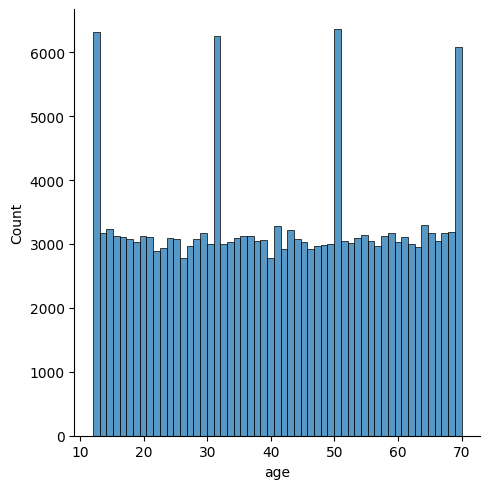

In [ ]:
# age distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['age'],kde=False)

<Axes: xlabel='gender', ylabel='count'>

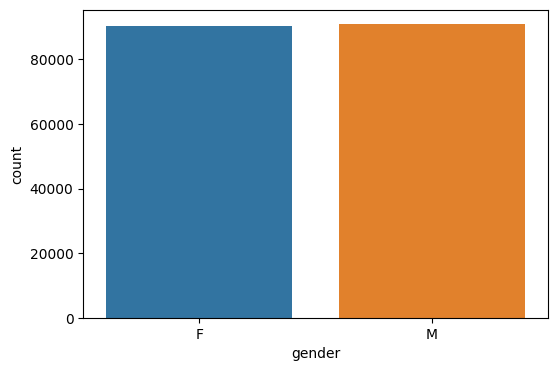

In [ ]:
# Comparing number of orders by gender

plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=orders)

In [ ]:
orders['gender'].value_counts()

M    90807
F    90411
Name: gender, dtype: int64

In [ ]:
# average customer age by gender

orders.groupby('gender')['age'].mean()

gender
F    40.904237
M    41.122259
Name: age, dtype: Float64

In [ ]:
# number of different product id's

orders['product_id'].nunique()

29035

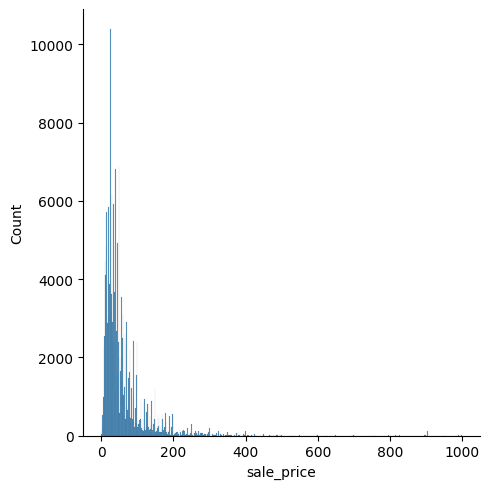

In [ ]:
# sale price distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['sale_price'],kde=False)

In [ ]:
orders['sale_price'].max()

999.0

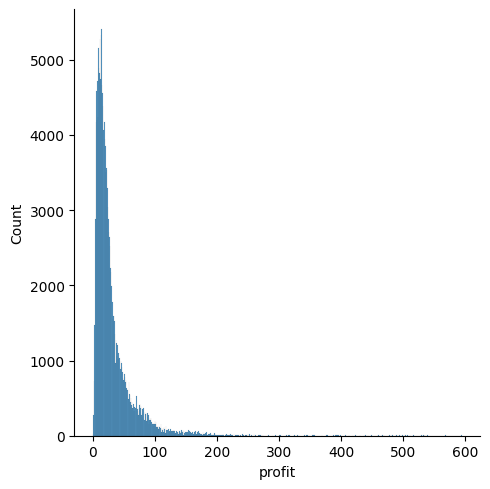

In [ ]:
# sales profit distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['profit'],kde=False)

In [ ]:
orders['profit'].max()

594.4

In [ ]:
orders['profit'].min()

0.01

In [ ]:
# average sales price by gender

orders.groupby('gender')['sale_price'].mean()

gender
F    55.963791
M    63.080977
Name: sale_price, dtype: float64

In [ ]:
# Number of customer orders by category

orders['category'].value_counts().sort_values(ascending=False)

Intimates                        13345
Jeans                            12751
Tops & Tees                      11808
Fashion Hoodies & Sweatshirts    11526
Swim                             11400
Sleep & Lounge                   11127
Sweaters                         11111
Shorts                           11082
Accessories                      10061
Active                            9170
Outerwear & Coats                 9007
Underwear                         7402
Pants                             7257
Socks                             6365
Dresses                           5468
Suits & Sport Coats               5079
Maternity                         5050
Plus                              4284
Socks & Hosiery                   3697
Pants & Capris                    3541
Leggings                          3260
Blazers & Jackets                 3129
Skirts                            2125
Suits                             1066
Jumpsuits & Rompers                906
Clothing Sets            

In [ ]:
orders['department'].value_counts()

Men      90807
Women    90411
Name: department, dtype: int64

In [ ]:
orders.groupby('gender')['department'].value_counts()

# gender and department are the same

gender  department
F       Women         90411
M       Men           90807
Name: department, dtype: int64

<Axes: xlabel='country', ylabel='count'>

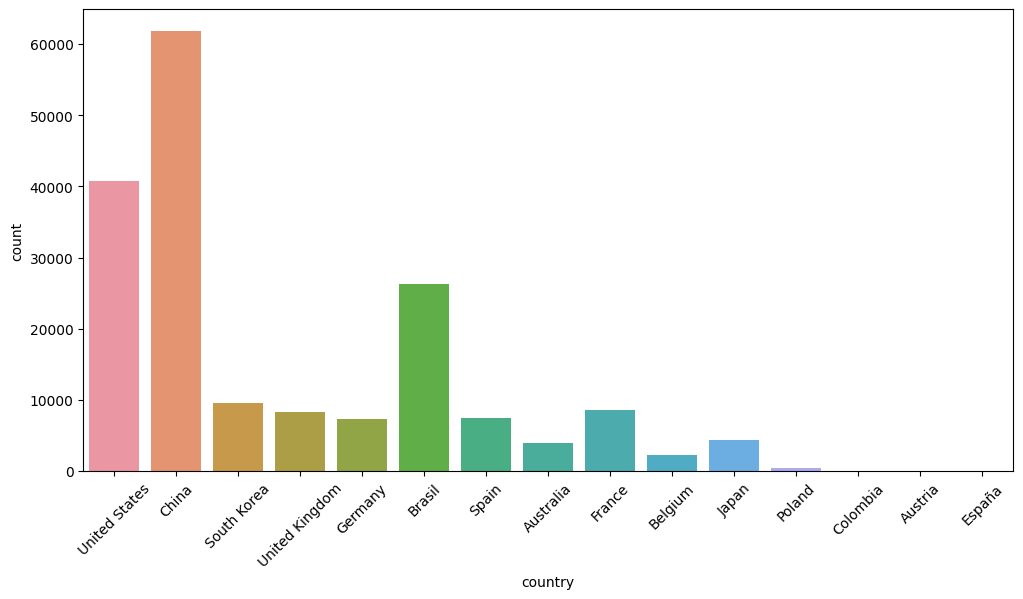

In [ ]:
# bar graph showing number of customer purchases by country

plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(x='country', data=orders)

In [ ]:
# Order of sales by category for China

orders[orders['country']=='China']['category'].value_counts()

Intimates                        4540
Jeans                            4390
Tops & Tees                      4019
Swim                             3909
Fashion Hoodies & Sweatshirts    3909
Shorts                           3800
Sweaters                         3799
Sleep & Lounge                   3769
Accessories                      3457
Outerwear & Coats                3096
Active                           3082
Underwear                        2550
Pants                            2540
Socks                            2155
Dresses                          1851
Suits & Sport Coats              1762
Maternity                        1709
Plus                             1476
Socks & Hosiery                  1252
Pants & Capris                   1206
Leggings                         1092
Blazers & Jackets                1002
Skirts                            723
Suits                             347
Jumpsuits & Rompers               309
Clothing Sets                      67
Name: catego

In [ ]:
# Order of sales by category for United States

orders[orders['country']=='United States']['category'].value_counts()

Intimates                        2997
Jeans                            2856
Fashion Hoodies & Sweatshirts    2600
Tops & Tees                      2600
Swim                             2560
Sleep & Lounge                   2554
Shorts                           2473
Sweaters                         2459
Accessories                      2240
Active                           2065
Outerwear & Coats                2046
Underwear                        1679
Pants                            1602
Socks                            1398
Dresses                          1293
Maternity                        1140
Suits & Sport Coats              1109
Plus                              945
Socks & Hosiery                   836
Pants & Capris                    772
Blazers & Jackets                 741
Leggings                          732
Skirts                            477
Jumpsuits & Rompers               233
Suits                             229
Clothing Sets                      47
Name: catego

In [ ]:
# Order of sales by category for women's department

orders[orders['department']=='Women']['category'].value_counts()

Intimates                        13345
Dresses                           5468
Jeans                             5068
Maternity                         5050
Swim                              5003
Fashion Hoodies & Sweatshirts     4983
Shorts                            4672
Sleep & Lounge                    4613
Tops & Tees                       4367
Accessories                       4294
Plus                              4284
Sweaters                          4143
Active                            3841
Socks & Hosiery                   3697
Pants & Capris                    3541
Outerwear & Coats                 3355
Leggings                          3260
Blazers & Jackets                 3129
Skirts                            2125
Suits                             1066
Jumpsuits & Rompers                906
Clothing Sets                      201
Name: category, dtype: int64

In [ ]:
# Order of sales by category for men's department

orders[orders['department']=='Men']['category'].value_counts()

Jeans                            7683
Tops & Tees                      7441
Underwear                        7402
Pants                            7257
Sweaters                         6968
Fashion Hoodies & Sweatshirts    6543
Sleep & Lounge                   6514
Shorts                           6410
Swim                             6397
Socks                            6365
Accessories                      5767
Outerwear & Coats                5652
Active                           5329
Suits & Sport Coats              5079
Name: category, dtype: int64

In [ ]:
# There are 1996 different product id #'s for jeans
orders[orders['category']=='Jeans']['product_id'].value_counts()

20606    17
4981     16
21339    16
21236    15
21531    15
         ..
4253      1
21324     1
21645     1
4442      1
20940     1
Name: product_id, Length: 1996, dtype: Int64

<Axes: xlabel='dc_state', ylabel='count'>

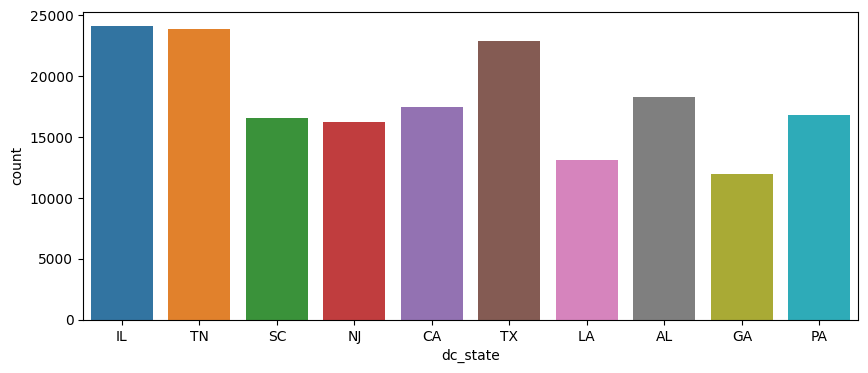

In [ ]:
# bar graph showing number of customer purchases by DC

plt.figure(figsize=(10,4))
sns.countplot(x='dc_state', data=orders)

<Axes: xlabel='shipped_at'>

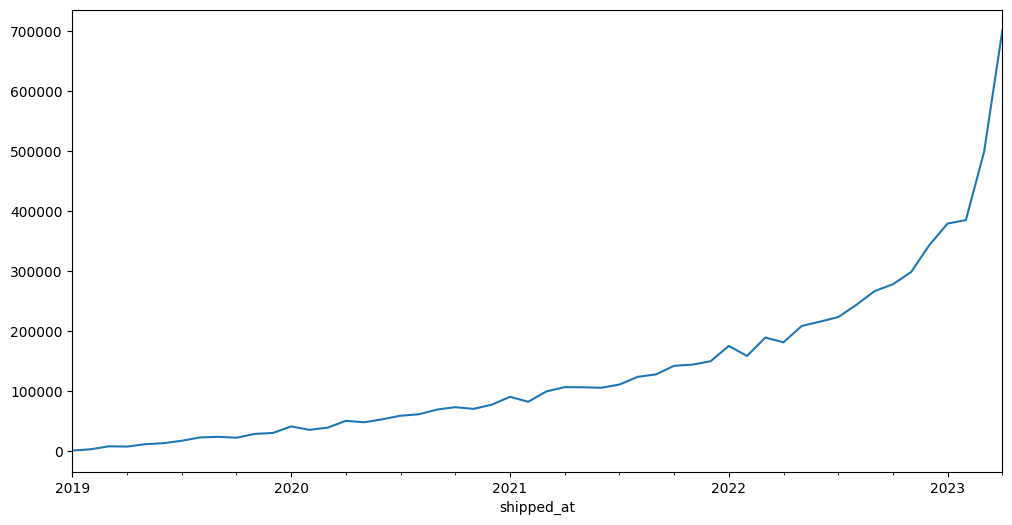

In [ ]:
# sales plot over time
plt.figure(figsize=(12,6))
orders.groupby('shipped_at')['sale_price'].sum().plot()

<Axes: xlabel='shipped_at'>

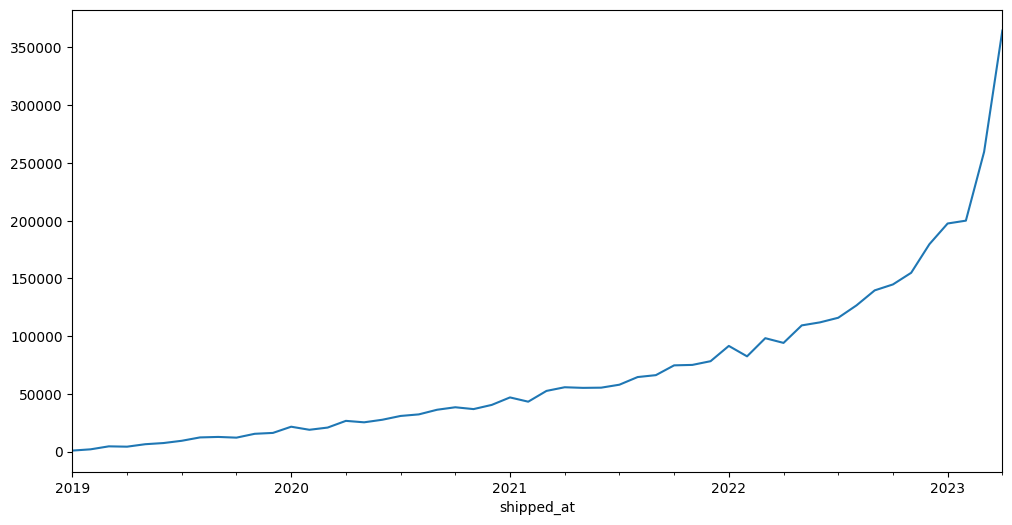

In [ ]:
# plot of profits over time
plt.figure(figsize=(12,6))
orders.groupby('shipped_at')['profit'].sum().plot()

In [ ]:
# last ship date

orders['shipped_at'].max()

Timestamp('2023-04-01 00:00:00')

In [ ]:
# first ship date

orders['shipped_at'].min()

Timestamp('2019-01-01 00:00:00')

In [ ]:
# Sales volume by DC

orders.groupby('dc_state')['sale_price'].sum().sort_values()

dc_state
SC     645360.08
GA     811602.93
LA     817900.67
NJ     926093.82
CA     964019.93
PA    1083780.40
AL    1215873.13
IL    1346669.62
TN    1378677.15
TX    1597958.91
Name: sale_price, dtype: float64

In [ ]:
# Profit by DC

orders.groupby('dc_state')['profit'].sum().sort_values()

dc_state
SC    325294.61
GA    411730.81
LA    431456.26
NJ    478896.06
CA    498267.34
PA    551084.14
AL    621410.06
IL    705307.89
TN    723301.24
TX    851418.25
Name: profit, dtype: float64

In [ ]:
# Sales volume by country

orders.groupby('country')['sale_price'].sum().sort_values()

country
España                109.89
Austria               339.94
Colombia             1552.13
Poland              23618.51
Belgium            133496.62
Australia          243037.61
Japan              251648.82
Germany            444747.26
Spain              450590.29
United Kingdom     495116.72
France             509877.86
South Korea        571700.82
Brasil            1570158.12
United States     2423242.91
China             3668699.14
Name: sale_price, dtype: float64

In [ ]:
# Sales volume by age

Age_sales = orders.groupby('age')['sale_price'].sum().sort_values()
Age_sales

age
26    168924.23
40    170726.96
22    171259.55
63    172073.91
57    173252.54
42    173970.82
48    174239.51
46    174659.99
69    174717.99
53    175495.71
19    176435.52
24    177183.69
27    177509.40
23    178000.68
30    178590.79
31    178632.94
44    178803.70
60    178890.62
21    179156.65
52    179285.89
38    179694.19
56    180100.37
33    180124.95
18    180223.29
70    180405.91
45    180691.68
47    180730.57
34    180795.83
25    181556.17
49    181738.20
58    182003.16
36    182638.05
54    182878.08
17    183067.62
39    183423.45
62    183508.62
66    184673.40
55    185524.38
35    185971.26
37    186120.74
65    186549.82
61    186913.31
12    187410.50
43    187877.14
14    187969.08
28    188752.05
16    189229.39
50    189496.08
67    189568.06
13    189675.55
59    189966.60
20    191262.05
29    191721.40
15    192393.67
68    192624.17
64    192649.33
51    196341.78
41    198473.64
32    201382.01
Name: sale_price, dtype: float64

In [ ]:
orders[["age", "sale_price"]].corr()

# no correlation between sales and age

,age,sale_price
age,1.000000,-0.001393
sale_price,-0.001393,1.000000


In [ ]:
orders[["profit", "sale_price"]].corr()

# correlation between profit and sale price is very strong

,profit,sale_price
profit,1.000000,0.987272
sale_price,0.987272,1.000000


In [ ]:
# number of unique products per category

orders.groupby('category')['product_id'].nunique()

category
Accessories                      1555
Active                           1431
Blazers & Jackets                 557
Clothing Sets                      37
Dresses                           949
Fashion Hoodies & Sweatshirts    1861
Intimates                        2352
Jeans                            1996
Jumpsuits & Rompers               162
Leggings                          562
Maternity                         896
Outerwear & Coats                1414
Pants                            1039
Pants & Capris                    610
Plus                              755
Shorts                           1760
Skirts                            366
Sleep & Lounge                   1765
Socks                             903
Socks & Hosiery                   666
Suits                             188
Suits & Sport Coats               739
Sweaters                         1733
Swim                             1793
Tops & Tees                      1860
Underwear                        1086
Nam

In [ ]:
# sales volume by category

category_sales = orders.groupby('category')['sale_price'].sum()
category_sales

category
Accessories                       422453.49
Active                            443827.68
Blazers & Jackets                 292001.15
Clothing Sets                      17949.65
Dresses                           462243.50
Fashion Hoodies & Sweatshirts     629383.25
Intimates                         450377.84
Jeans                            1256361.47
Jumpsuits & Rompers                44003.44
Leggings                           88989.07
Maternity                         257006.90
Outerwear & Coats                1307805.78
Pants                             435249.33
Pants & Capris                    195235.81
Plus                              164462.20
Shorts                            513320.12
Skirts                            113297.12
Sleep & Lounge                    552377.31
Socks                             126378.92
Socks & Hosiery                    62437.98
Suits                             124812.57
Suits & Sport Coats               644046.53
Sweaters               

In [ ]:
# profit by category

category_profit = orders.groupby('category')['profit'].sum()
category_profit

category
Accessories                      253167.03
Active                           257525.88
Blazers & Jackets                181225.94
Clothing Sets                      6867.13
Dresses                          253989.95
Fashion Hoodies & Sweatshirts    302802.91
Intimates                        210693.78
Jeans                            583943.72
Jumpsuits & Rompers               20507.80
Leggings                          35601.80
Maternity                        143663.39
Outerwear & Coats                727537.26
Pants                            235464.01
Pants & Capris                    91943.22
Plus                              82094.49
Shorts                           256451.12
Skirts                            68074.01
Sleep & Lounge                   286926.18
Socks                             50056.17
Socks & Hosiery                   37320.50
Suits                             49565.71
Suits & Sport Coats              385388.01
Sweaters                         436211.07
Sw

In [ ]:
# profit margin by category
category_profit/category_sales

category
Accessories                      0.599278
Active                           0.580238
Blazers & Jackets                0.620634
Clothing Sets                    0.382577
Dresses                          0.549472
Fashion Hoodies & Sweatshirts    0.481111
Intimates                        0.467816
Jeans                            0.464790
Jumpsuits & Rompers              0.466050
Leggings                         0.400069
Maternity                        0.558987
Outerwear & Coats                0.556304
Pants                            0.540986
Pants & Capris                   0.470934
Plus                             0.499169
Shorts                           0.499593
Skirts                           0.600845
Sleep & Lounge                   0.519439
Socks                            0.396080
Socks & Hosiery                  0.597721
Suits                            0.397121
Suits & Sport Coats              0.598385
Sweaters                         0.518519
Swim                     

In [ ]:
# sales volume by department

department_sales = orders.groupby('department')['sale_price'].sum()
department_sales

department
Men      5728194.31
Women    5059742.33
Name: sale_price, dtype: float64

In [ ]:
# profit by department

department_profit = orders.groupby('department')['profit'].sum()
department_profit

department
Men      2968369.44
Women    2629797.22
Name: profit, dtype: float64

In [ ]:
# profit margin by department
department_profit/department_sales

department
Men      0.518203
Women    0.519749
dtype: float64

In [ ]:
# profit margin by DC
DC_sales = orders.groupby('dc_state')['sale_price'].sum()
DC_profit = orders.groupby('dc_state')['profit'].sum()
DC_profit/DC_sales

dc_state
AL    0.511081
CA    0.516864
GA    0.507306
IL    0.523742
LA    0.527517
NJ    0.517114
PA    0.508483
SC    0.504051
TN    0.524634
TX    0.532816
dtype: float64

In [ ]:
# profit margin by country
Location_sales = orders.groupby('country')['sale_price'].sum()
Location_profit = orders.groupby('country')['profit'].sum()
Location_profit/Location_sales

country
Australia         0.520606
Austria           0.516032
Belgium           0.516887
Brasil            0.518849
China             0.518877
Colombia          0.515891
España            0.507781
France            0.520829
Germany           0.519134
Japan             0.516278
Poland            0.517649
South Korea       0.517928
Spain             0.517161
United Kingdom    0.517365
United States     0.519738
dtype: float64

In [ ]:
# return max profit margin
orders['profit_margin'].max()

0.67

In [ ]:
# return min profit margin
orders['profit_margin'].min()

0.33

In [ ]:
# save data set to Google Drive

from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
orders.to_csv('orders.csv')
!cp orders.csv "drive/My Drive/Projects/BigQuery/Ecommerce/"